In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd ./drive/MyDrive/hopfield-network-for-paper/
!pip install -r requirements.txt

[Errno 2] No such file or directory: './drive/MyDrive/hopfield-network-for-paper/'
/content/drive/MyDrive/hopfield-network-for-paper


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('hls', 10)
from tqdm import tqdm

In [ ]:
# 输入大小
N = 400
# 模式个数，这里设置的较大来测试串扰
P = 100
# MASK的大小
NO_OF_BITS_TO_CHANGE = 300
N_sqrt = np.sqrt(N).astype('int32')
NO_OF_ITERATIONS = 10

In [ ]:
# 生成一个大小为P×N的随机二维数组，其中每个元素都是1或-1
epsilon = np.asarray([np.random.choice([1, -1], size=N)])
for i in range(P-1):
    epsilon = np.append(epsilon, [np.random.choice([1, -1], size=N)], axis=0)

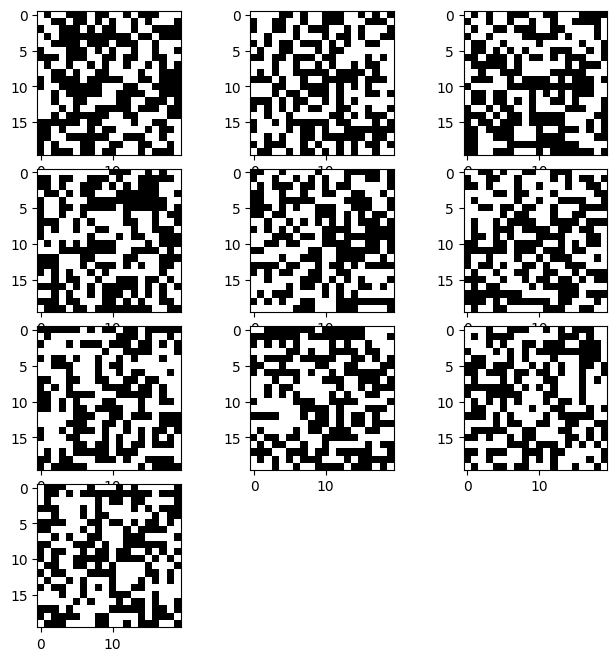

In [ ]:
# 画出这些随机模式
fig = plt.figure(figsize = (8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for num, i in enumerate(epsilon[0:10]):
    plt.subplot(4, 3,num+1)
    plt.imshow(np.where(i.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')

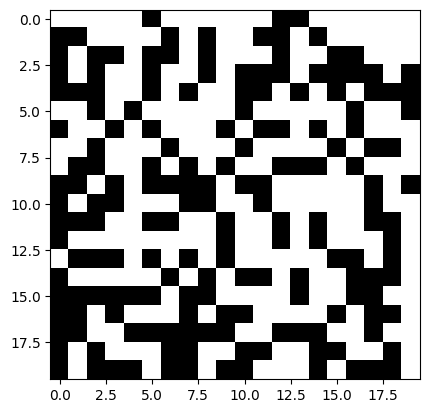

In [ ]:
# 选择模式0进行掩码
import copy
test_array = copy.deepcopy(epsilon[0])
random_pattern_test = np.random.choice([1, -1], size=NO_OF_BITS_TO_CHANGE)
test_array[:NO_OF_BITS_TO_CHANGE] = random_pattern_test

plt.imshow(test_array.reshape(N_sqrt, N_sqrt), cmap='gray')

In [ ]:
test_array.shape

(400,)

In [ ]:
# Hebbian算法，计算权重
w = np.zeros((N, N))
h = np.zeros((N))
for i in tqdm(range(N)):
    for j in range(N):
        for p in range(P):
            w[i, j] += (epsilon[p, i]*epsilon[p, j]).sum()
        if i==j:
            w[i, j] = 0
w /= N
w.shape

100%|██████████| 400/400 [00:57<00:00,  7.00it/s]


(400, 400)

100%|██████████| 10/10 [00:01<00:00,  6.80it/s]


array([80., 58., 56., 59., 62., 65., 71., 71., 76., 78.])

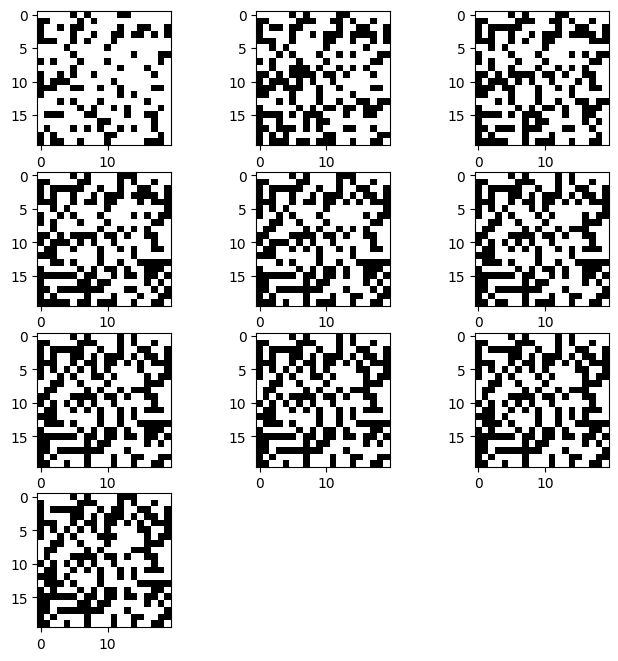

In [ ]:
fig = plt.figure(figsize = (8, 8))
hamming_distance = np.zeros(NO_OF_ITERATIONS)
for iteration in tqdm(range(NO_OF_ITERATIONS)):
    for i in range(N):
        i = np.random.randint(N)
        h[i] = 0
        for j in range(N):
            h[i] += w[i, j]*test_array[j]
    test_array = np.where(h<0, -1, 1)
    hamming_distance[iteration] = ((epsilon[0] - test_array)!=0).sum()
    plt.subplot(4, 3,iteration+1)
    plt.imshow(np.where(test_array.reshape(N_sqrt, N_sqrt)<1, 0, 1), cmap='gray')
hamming_distance

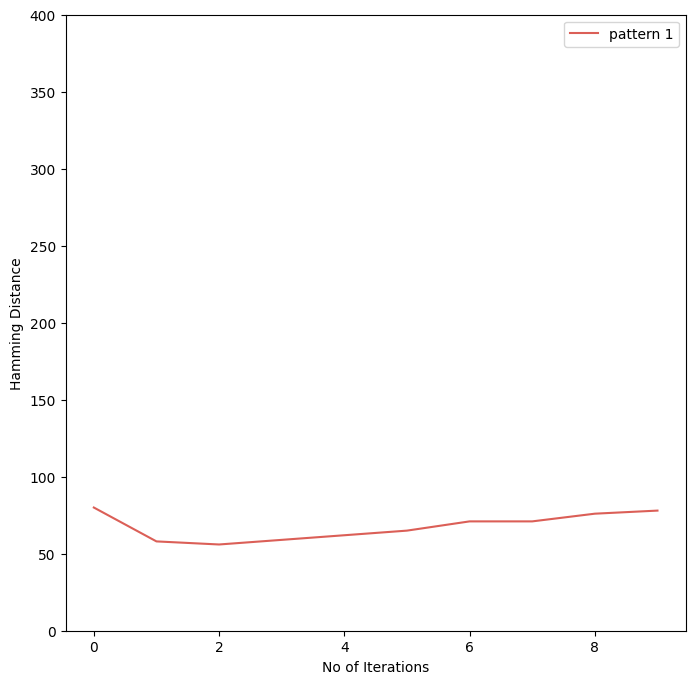

In [ ]:
# 可以看到有非常强的串扰
fig = plt.figure(figsize = (8, 8))
plt.plot(hamming_distance)
plt.xlabel('No of Iterations')
plt.ylabel('Hamming Distance')
plt.ylim([0, 400])
plt.legend(['pattern 1'],  loc='best')
plt.show()